## Libraries

In [1]:
from keras.models import Sequential,load_model
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array,load_img
import matplotlib.pyplot as plt
import numpy as np
import string
plt.style.use('dark_background')


# **_Understanding Our Dataset_**

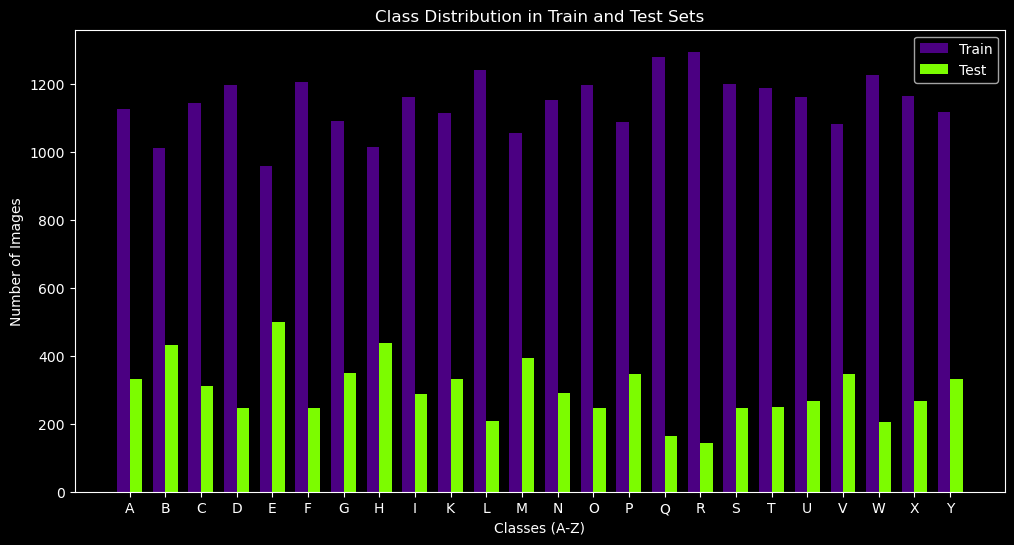

In [13]:
from collections import Counter
import os
# Path to your train and test directories
train_dir = "Train"
test_dir = "Test"

def get_class_distribution(directory):
    # Count the number of files in each class folder
    class_counts = {}
    for class_folder in os.listdir(directory):
        class_path = os.path.join(directory, class_folder)
        if os.path.isdir(class_path):
            class_counts[class_folder] = len(os.listdir(class_path))
    return class_counts

# Get distribution for both train and test directories
train_counts = get_class_distribution(train_dir)
test_counts = get_class_distribution(test_dir)

# Combine the counts for a stacked bar plot
classes = sorted(train_counts.keys())  # Ensure alphabetical order
train_values = [train_counts[cls] for cls in classes]
test_values = [test_counts[cls] for cls in classes]

# Plotting
plt.figure(figsize=(12, 6))
bar_width = 0.35

# Plotting train and test bars side by side
index = range(len(classes))
plt.bar(index, train_values, bar_width, label="Train",color='#4b0082')
plt.bar([i + bar_width for i in index], test_values, bar_width, label="Test",color='#7cfc00')

# Add labels and title
plt.xlabel("Classes (A-Z)")
plt.ylabel("Number of Images")
plt.title("Class Distribution in Train and Test Sets")
plt.xticks([i + bar_width / 2 for i in index], classes)  # Center labels
plt.legend()

plt.show()

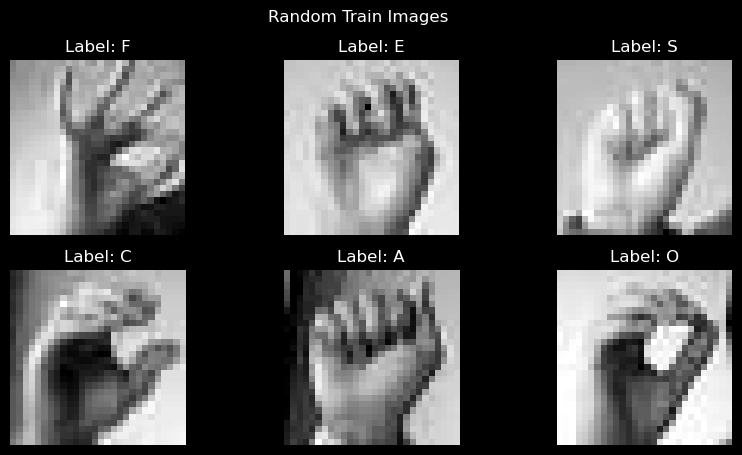

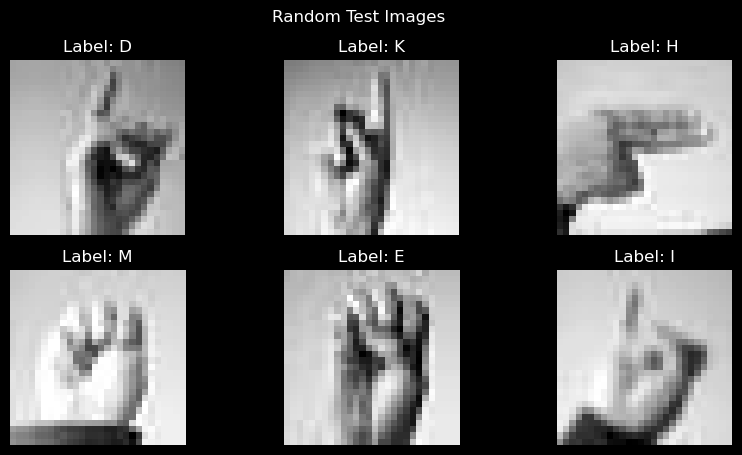

In [16]:
import random
import matplotlib.image as mpimg
def get_random_images(directory, num_images=6):
    images = []
    labels = []
    
    # Get all class folders
    class_folders = os.listdir(directory)
    
    # Loop until we have enough random images
    for _ in range(num_images):
        # Choose a random class folder
        class_folder = random.choice(class_folders)
        class_path = os.path.join(directory, class_folder)
        
        # Choose a random image from the selected class folder
        image_name = random.choice(os.listdir(class_path))
        image_path = os.path.join(class_path, image_name)
        
        # Store the image path and its label
        images.append(image_path)
        labels.append(class_folder)
    
    return images, labels

# Get random images from train and test directories
train_images, train_labels = get_random_images(train_dir)
test_images, test_labels = get_random_images(test_dir)

# Plotting function
def plot_images(images, labels, title):
    plt.figure(figsize=(10, 5))
    for i, (image_path, label) in enumerate(zip(images, labels)):
        img = mpimg.imread(image_path)
        plt.subplot(2, 3, i + 1)  # 2 rows, 3 columns
        plt.imshow(img, cmap="gray")
        plt.title(f"Label: {label}")
        plt.axis("off")
    plt.suptitle(title)
    plt.show()

# Display random images from train and test sets
plot_images(train_images, train_labels, "Random Train Images")
plot_images(test_images, test_labels, "Random Test Images")

In [19]:
def count_images(directory):
    total_images = 0
    for class_folder in os.listdir(directory):
        class_path = os.path.join(directory, class_folder)
        if os.path.isdir(class_path):
            total_images += len(os.listdir(class_path))
    return total_images

# Count images in train and test directories
train_count = count_images(train_dir)
test_count = count_images(test_dir)

# Function to get the shape of a single random image
def get_random_image_shape(directory):
    # Select a random class folder
    class_folder = random.choice(os.listdir(directory))
    class_path = os.path.join(directory, class_folder)
    
    # Select a random image from the chosen class folder
    image_name = random.choice(os.listdir(class_path))
    image_path = os.path.join(class_path, image_name)
    
    # Read the image and get its shape
    img = mpimg.imread(image_path)
    return img.shape

# Get shape of one image from train and test directories
train_image_shape = get_random_image_shape(train_dir)
test_image_shape = get_random_image_shape(test_dir)

# Print the results
print(f"Total images in train set: {train_count}")
print(f"Shape of one image in train set: {train_image_shape}")
print(f"Total images in test set: {test_count}")
print(f"Shape of one image in test set: {test_image_shape}")

Total images in train set: 27455
Shape of one image in train set: (28, 28)
Total images in test set: 7172
Shape of one image in test set: (28, 28)


In [ ]:
image_data_generator=ImageDataGenerator(rescale=1.0/255,zoom_range=0.2,shear_range=0.2,horizontal_flip=True,validation_split=0.2)

## Training Data

In [20]:
image_data_generator = ImageDataGenerator(
    rescale=1.0/255,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% of data reserved for validation
)

# Load the training set (80% of data) and validation set (20% of data) from the "Train" directory
training_set = image_data_generator.flow_from_directory(
    "Train",
    target_size=(28, 28),
    batch_size=32,
    color_mode='grayscale',
    class_mode='categorical',  # Ensure to specify the class mode
    subset='training'          # Corrected subset name
)

validation_set = image_data_generator.flow_from_directory(
    "Train",
    target_size=(28, 28),
    batch_size=32,
    color_mode='grayscale',
    class_mode='categorical',  # Ensure to specify the class mode
    subset='validation'        # Corrected subset name
)

Found 21974 images belonging to 24 classes.
Found 5481 images belonging to 24 classes.


# Testing Data

In [21]:
test_data_generator = ImageDataGenerator(rescale=1.0/255)


testing_set = test_data_generator.flow_from_directory(
    "Test",
    target_size=(28, 28),
    batch_size=32,
    color_mode="grayscale",
    class_mode='categorical',  # Set class_mode for multi-class classification
    shuffle=False              # Important to keep shuffle=False for consistent evaluation
)

Found 7172 images belonging to 24 classes.


# CNN

In [22]:

model_v2 = Sequential([
    Conv2D(32, kernel_size=3, activation="relu", input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPool2D(pool_size=2, strides=2),
    Dropout(0.3),

    Conv2D(64, kernel_size=3, activation="relu"),
    BatchNormalization(),
    MaxPool2D(pool_size=2, strides=2),
    Dropout(0.3),

    Conv2D(128, kernel_size=3, activation="relu"),
    BatchNormalization(),
    MaxPool2D(pool_size=2, strides=2),
    Dropout(0.4),

    GlobalAveragePooling2D(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(24, activation="softmax")  # Adjust to the number of classes
])



c:\Users\Dell\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model_v2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 3, 3, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │         3,096 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113,176 (442.09 KB)

 Trainable params: 112,728 (440.34 KB)

 Non-trainable params: 448 (1.75 KB)

In [23]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [24]:
# model_v2.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
lr_scheduler = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=5, verbose=1)
early_stopping = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True, verbose=1)
model_v2.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


In [25]:
history_v2=model_v2.fit(training_set,validation_data=validation_set,epochs=40 ,callbacks=[lr_scheduler, early_stopping])

c:\Users\Dell\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
687/687 ━━━━━━━━━━━━━━━━━━━━ 134s 187ms/step - accuracy: 0.1452 - loss: 3.1156 - val_accuracy: 0.5585 - val_loss: 1.3540 - learning_rate: 0.0010
Epoch 2/40
687/687 ━━━━━━━━━━━━━━━━━━━━ 53s 77ms/step - accuracy: 0.4583 - loss: 1.6079 - val_accuracy: 0.7714 - val_loss: 0.7179 - learning_rate: 0.0010
Epoch 3/40
687/687 ━━━━━━━━━━━━━━━━━━━━ 49s 71ms/step - accuracy: 0.6157 - loss: 1.1165 - val_accuracy: 0.8285 - val_loss: 0.5466 - learning_rate: 0.0010
Epoch 4/40
687/687 ━━━━━━━━━━━━━━━━━━━━ 48s 69ms/step - accuracy: 0.6907 - loss: 0.8969 - val_accuracy: 0.7811 - val_loss: 0.7227 - learning_rate: 0.0010
Epoch 5/40
687/687 ━━━━━━━━━━━━━━━━━━━━ 49s 71ms/step - accuracy: 0.7355 - loss: 0.7568 - val_accuracy: 0.9184 - val_loss: 0.2576 - learning_rate: 0.0010
Epoch 6/40
687/687 ━━━━━━━━━━━━━━━━━━━━ 92s 85ms/step - accuracy: 0.7773 - loss: 0.6547 - val_accuracy: 0.9309 - val_loss: 0.2316 - learning_rate: 0.0010
Epoch 7/40
687/687 ━━━━━━━━━━━━━━━━━━━━ 155s 225ms/step - accuracy: 0.7979

# **_Evalutaing Part_**

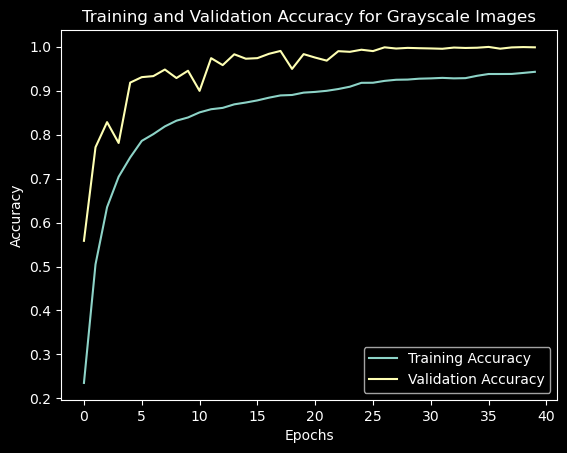

In [26]:
plt.plot(history_v2.history['accuracy'],label='Training Accuracy')
plt.plot(history_v2.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy for Grayscale Images")
plt.show()

In [28]:
from sklearn.metrics import classification_report, accuracy_score, f1_score
test_loss, test_accuracy = model_v2.evaluate(testing_set)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Get predictions for the test set
predictions = model_v2.predict(testing_set)
predicted_classes = np.argmax(predictions, axis=1)  # Get the class with the highest probability
true_classes = testing_set.classes  # Actual class labels

# Classification report
report = classification_report(true_classes, predicted_classes, target_names=testing_set.class_indices.keys())
print("Classification Report:\n", report)

# F1 Score
f1 = f1_score(true_classes, predicted_classes, average='weighted')
print(f"F1 Score: {f1:.2f}")

c:\Users\Dell\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


225/225 ━━━━━━━━━━━━━━━━━━━━ 51s 228ms/step - accuracy: 0.9701 - loss: 0.0656
Test Accuracy: 95.91%
225/225 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step
Classification Report:
               precision    recall  f1-score   support

           A       1.00      1.00      1.00       331
           B       1.00      1.00      1.00       432
           C       0.94      0.93      0.94       310
           D       0.99      0.95      0.97       245
           E       0.97      1.00      0.99       498
           F       1.00      1.00      1.00       247
           G       0.81      0.94      0.87       348
           H       0.93      0.92      0.92       436
           I       1.00      0.92      0.96       288
           K       1.00      0.93      0.97       331
           L       0.91      1.00      0.95       209
           M       0.97      1.00      0.98       394
           N       1.00      0.94      0.97       291
           O       0.91      0.91      0.91       246
           P       1.00

225/225 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step


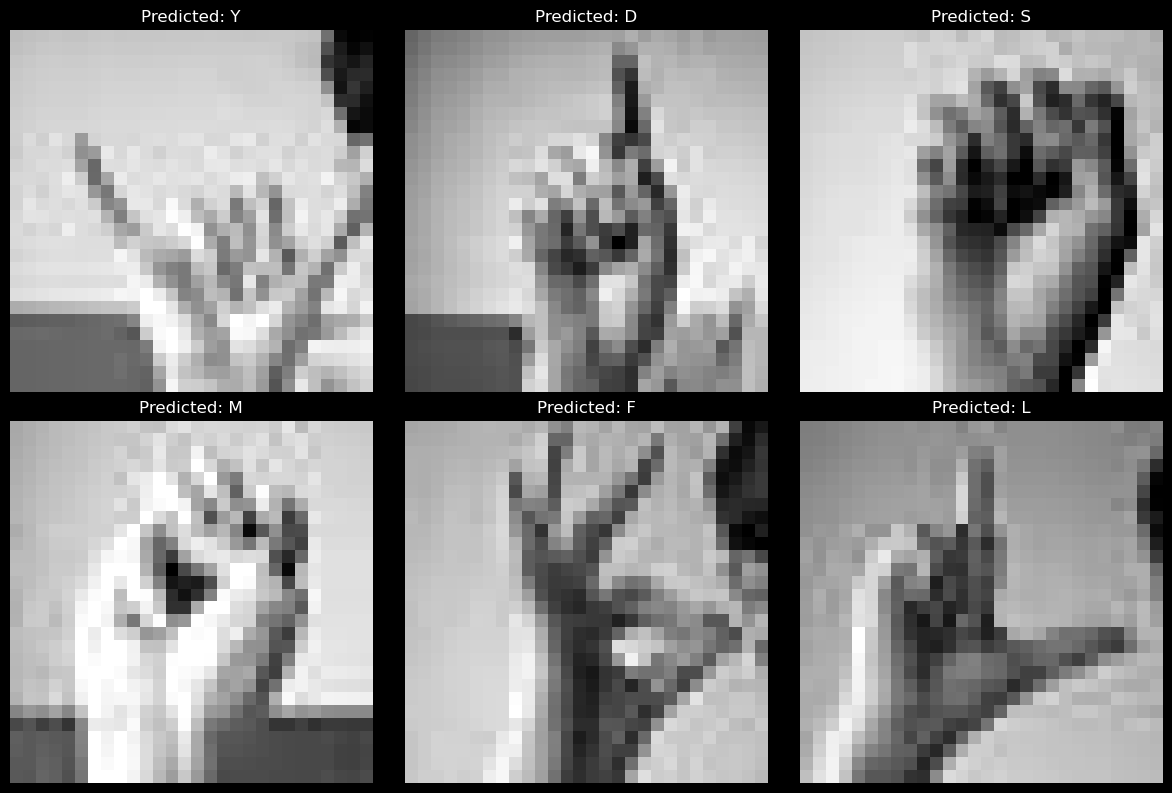

In [30]:
from tensorflow.keras.preprocessing import image
def plot_correct_predictions(testing_set, model, num_images=6):
    # Get the image paths and labels from the testing set
    image_paths = testing_set.filepaths
    true_labels = testing_set.classes
    class_labels = list(testing_set.class_indices.keys())

    # Get model predictions
    predictions = model.predict(testing_set)
    predicted_classes = np.argmax(predictions, axis=1)

    # Find indices where predictions were correct
    correct_indices = np.where(predicted_classes == true_labels)[0]

    # Randomly select num_images correct predictions
    selected_indices = random.sample(list(correct_indices), num_images)

    # Plot the images
    plt.figure(figsize=(12, 8))
    for i, idx in enumerate(selected_indices):
        img = image.load_img(image_paths[idx], target_size=(28, 28), color_mode='grayscale')
        img_array = image.img_to_array(img) / 255.0  # Normalize the image
        label = class_labels[predicted_classes[idx]]
        
        plt.subplot(2, 3, i + 1)
        plt.imshow(img_array, cmap='gray')
        plt.title(f"Predicted: {label}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Call the function to plot 6 correctly predicted images
plot_correct_predictions(testing_set, model_v2, num_images=6)


In [31]:
model_v2.save("cnn_model.h5")

In [32]:
import requests

url = 'http://127.0.0.1:5000/predict'

# Load an image (ensure it's in the correct format)
image_path = 'G:/Python/Alphapet/Test/A/3_A.jpg'
with open(image_path, 'rb') as img_file:
    response = requests.post(url, files={'image': img_file})

# Print the response from the server
print(response.json())

{'class': 'A'}
